In [6]:
import numpy as np
import os
import cv2

In [7]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [9]:
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD,Adadelta,Adagrad,Adam,RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D,Activation

In [10]:
import matplotlib.pyplot as plt

In [13]:
data_dir="flowers"

In [23]:
data=[]
label=[]



size=128  #size of the image

for folder in os.listdir(data_dir):
    for file in os.listdir(os.path.join(data_dir,folder)):
        if file.endswith(".jpg"):
            label.append(folder)
            img=cv2.imread(os.path.join(data_dir,folder,file))
            img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            im=cv2.resize(img_rgb,(size,size))
            data.append(im)
        else:
            continue
            
data_arr=np.array(data)
label_arr=np.array(label)

In [30]:
encoder=LabelEncoder()
y=encoder.fit_transform(label_arr)
y=to_categorical(y,5)
x=data_arr/255

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [34]:
model=Sequential()
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="Same",activation='relu',input_shape=(size,size,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dropout(rate=0.5))
model.add(Dense(5,activation="softmax"))



datagen=ImageDataGenerator(rotation_range=0.2,zoom_range=0.2,width_shift_range=0.3,height_shift_range=0.3,horizontal_flip=True,vertical_flip=True)
datagen.fit(x_train)



model.compile(optimizer=Adam(lr=0.0001),loss='categorical_crossentropy',metrics=["accuracy"])
batch_size=32
epochs=10
model.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size),
                                epochs=epochs,
                                validation_data=(x_test,y_test),
                                verbose=1
                                )


C:\Users\Rutvik\AppData\Local\Temp/ipykernel_10588/3755437607.py:26: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size),


Epoch 1/10
108/108 [==============================] - 1119s 10s/step - loss: 1.4857 - accuracy: 0.3197 - val_loss: 1.3048 - val_accuracy: 0.4178
Epoch 2/10
108/108 [==============================] - 1018s 9s/step - loss: 1.3319 - accuracy: 0.4248 - val_loss: 1.1916 - val_accuracy: 0.5000
Epoch 3/10
108/108 [==============================] - 1024s 9s/step - loss: 1.2939 - accuracy: 0.4535 - val_loss: 1.1172 - val_accuracy: 0.5683
Epoch 4/10
108/108 [==============================] - 997s 9s/step - loss: 1.2012 - accuracy: 0.5117 - val_loss: 1.0566 - val_accuracy: 0.5741
Epoch 5/10
108/108 [==============================] - 1008s 9s/step - loss: 1.1827 - accuracy: 0.5195 - val_loss: 1.0908 - val_accuracy: 0.5868
Epoch 6/10
108/108 [==============================] - 1008s 9s/step - loss: 1.1198 - accuracy: 0.5491 - val_loss: 1.1084 - val_accuracy: 0.5729
Epoch 7/10
108/108 [==============================] - 944s 9s/step - loss: 1.1137 - accuracy: 0.5555 - val_loss: 0.9778 - val_accuracy: 

In [35]:
categories=np.sort(os.listdir(data_dir))

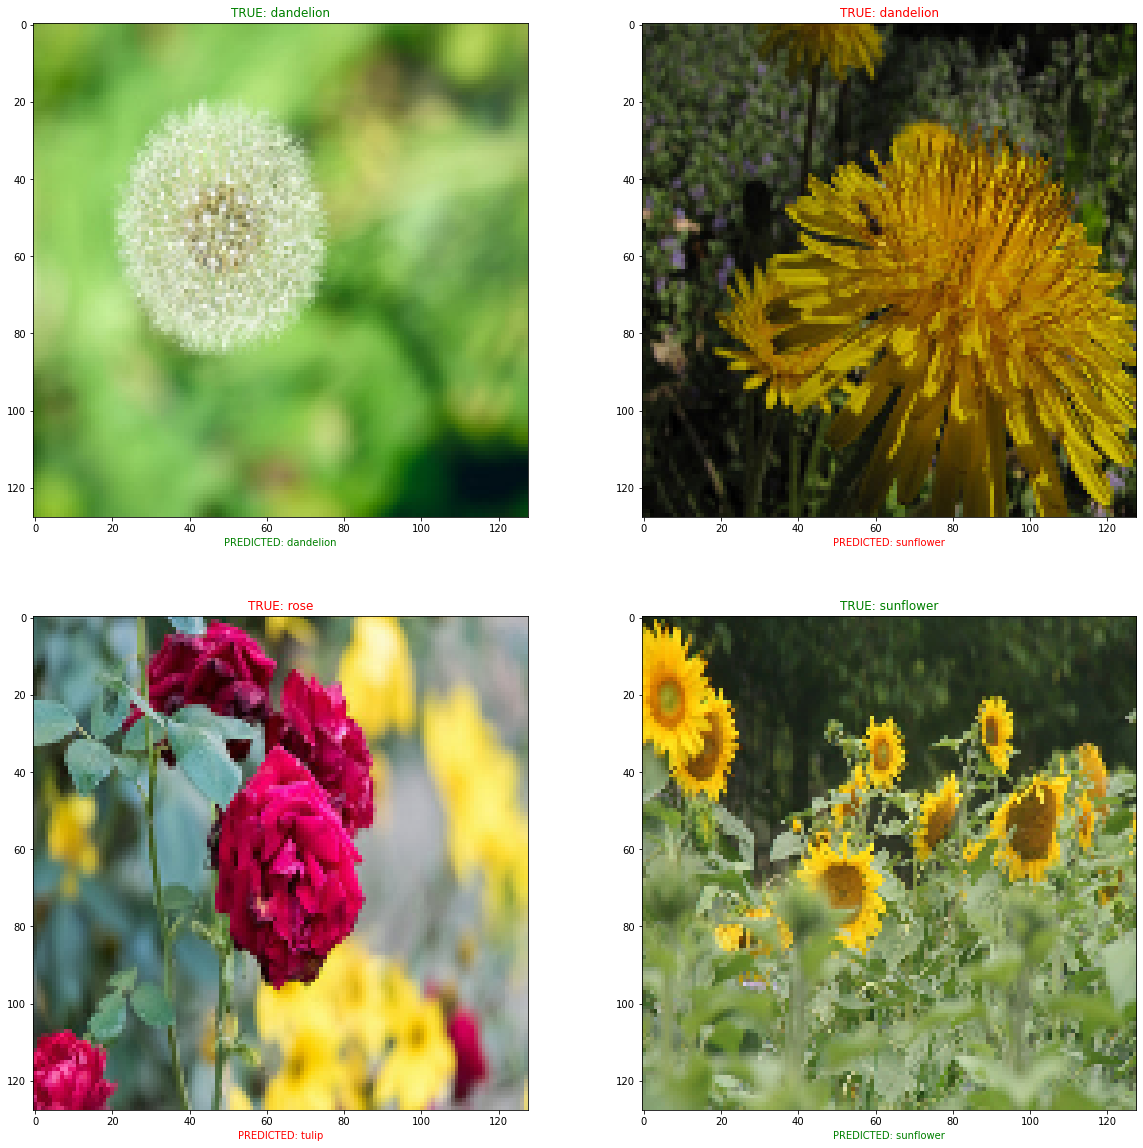

In [43]:
fig, ax = plt.subplots(2,2, figsize=(20, 20))

for i in range(2):
    for j in range(2):
        k = int(np.random.random_sample() * len(x_test))
        if(categories[np.argmax(y_test[k])] == categories[np.argmax(model.predict(x_test)[k])]):
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='green')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(x_test)[k])], color='green')
            ax[i,j].imshow(np.array(x_test)[k].reshape(size, size, 3), cmap='gray')
        else:
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='red')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(x_test)[k])], color='red')
            ax[i,j].imshow(np.array(x_test)[k].reshape(size, size, 3), cmap='gray')